Fish Data: RFECV, grid search superparameter, ten fold cross validation

鱼类数据：RFECV,网格搜索超参，十折交叉验证

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import myrfecv as mr

path_data_raw = "C:/Users/dell/OneDrive/file/"
path_country_nc = "C:/Users/dell/OneDrive/file/nc"
path_onedrive_csv = "C:/Users/dell/OneDrive/file/csv/"
path_one_spdb = 'C:/Users/dell/OneDrive/file/SPDB/'
drive_letter = 'E:'

path_pre = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/pretreatment/"
path_match = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/match/"
path_semdata = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/semdata/"

path_2_preanalysis_data = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part2_sem/preanalysis/"
path_2_preanalysis_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part2_sem/preanalysis/"
path_3_sw_forecast = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/"
path_temp = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/temp/"


mark_num = "25"
meta_name = "meta_data.csv"

list_pfas =['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
list_pfas_lc = ['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA']
list_pfas_sc = ['PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
list_color = ["#4d8cbf", "#4f9c8b", "#555c6c", "#d77563", "#7d84a8", "#84aeb8", "#c3473b", "#89756d","#ffb3cc","#9a7ebf","#ffddb8", "#c4eaff", "#d1c6ff", "#c2ffbf", "#f5f5b0"]
dic_color = dict(zip(list_pfas,list_color))

In [ ]:
df_meta = pd.read_csv(path_data_raw + meta_name, encoding="utf-8")

Index(['TOTALS_CO2_E', 'GDP', 'u10', 'cth', 'C2F6', 'licd', 'night_lights',
       'ref_ice', 'cfc', 'ltlt', 'stl1', 'cl', 'v10', 'v100',
       'estuary_distance', 'TNR_Ship_CO2_E', 'sp', 'sshf', 'tp',
       'port_distance', 'human_footprint', 'HFC', 'ctt', 'HCFC', 'ref_liq',
       'skt', 'mine_distance', 'ctp', 'fluorite_consumption', 'sro', 'tcrw',
       'paper_consumption', 'swvl1', 'tcsw', 'SF6', 'nships_smoothed',
       'population', 'CF4', 'i10fg', 'global_salinity', 'SWD_INC_CO2_E',
       'ssro', 'si10', 'wrap_consumption', 'e', 'lict', 'ssr', 'str', 'z',
       'u100', 'dl', 'log_Koc', 'solubility', 'sp_length', 'po_carbon',
       'melting_point', 'log_Kow', 'log_Koa_wet', 'boiling_point', 'sp_weight',
       'log_Kaw', 'density', 'po_f_carbon', 'sp_troph', 'log_Koa_dry',
       'po_xlogp', 'log_KHxd_air', 'log_Koil_w', 'po_m_w', 'log_Koil_air',
       'value', 'organ_muscle', 'organ_whole', 'habitat', 'po_chain', 'year',
       'sw_value'],
      dtype='object')
GBDT Op

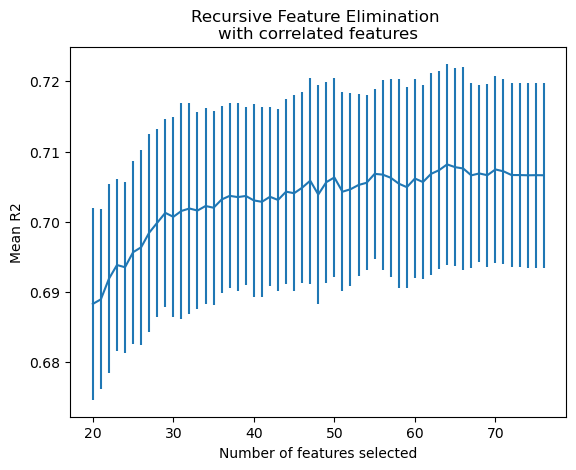

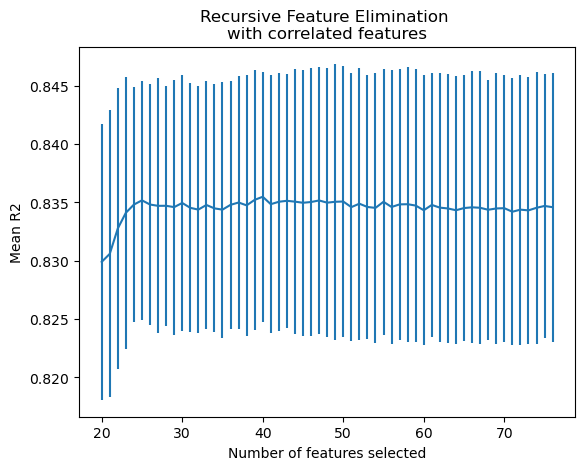

In [2]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
df_lr_data_raw = pd.read_csv(path_semdata + "sem_lrsws7_au_to_25_avg_full.csv")
df_lr_data_raw['year'] = (df_lr_data_raw['year'] - 2000) / (2020 - 2000)
columns_to_drop = ['lon_grid', 'lat_grid']
df_lr_data = df_lr_data_raw.drop(columns=columns_to_drop)
print(df_lr_data.columns)

dict_clf = {
    'GBDT': GradientBoostingRegressor(random_state=202406),
    'RF': RandomForestRegressor(random_state=202406),
}

path_lr_rfecv_data = drive_letter + '/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lr_forecast/'
path_lr_rfecv_fig = drive_letter + '/wyy/code_project/running_outcome/final_fig/SPDB/part3_forecast/lr_forecast/'
str_marker_type = 'lrsws7'
for key, clf in dict_clf.items():
    mr.start_rfecv(key, clf, df_lr_data, str_marker_type, path_lr_rfecv_data, path_lr_rfecv_fig, 'cv')

df_lr_rf_rfecv = pd.read_csv(path_lr_rfecv_data + str_marker_type + '_rfecv_r2_RFcv.csv')
df_lr_rf_rfecv['model'] = 'RF'
df_lr_gbdt_rfecv = pd.read_csv(path_lr_rfecv_data + str_marker_type + '_rfecv_r2_GBDTcv.csv')
df_lr_gbdt_rfecv['model'] = 'GBDT'

df_lr_rfecv = pd.concat([df_lr_rf_rfecv,df_lr_gbdt_rfecv],axis=0)

df_lr_rfecv = df_lr_rfecv.sort_values(by='mean_test_score', ascending=False)
print(df_lr_rfecv.head())
max_index = df_lr_rfecv['mean_test_score'].idxmax()
min_features = df_lr_rfecv.loc[max_index, 'min_features'].tolist()[0]
max_model = df_lr_rfecv.loc[max_index, 'model'].tolist()[0]
max_score = round(df_lr_rfecv.loc[max_index, 'mean_test_score'].tolist()[0],3)
df_lr_rfecv.to_csv(path_lr_rfecv_data + str_marker_type + '_merge_rfecv.csv',index=False)
print(f'model:{max_model} min_feature:{min_features} score:{max_score}')


In [4]:
scoring = 'r2'
str_describe = 'lrsws7'
df_lr_sem = pd.read_csv(path_semdata + "sem_lrsws7_au_to_25_avg_full.csv")

df_lr_sem['year'] = (df_lr_sem['year'] - 2000) / (2020 - 2000)
columns_to_drop = ['lon_grid', 'lat_grid']
df_lr_sem = df_lr_sem.drop(columns=columns_to_drop)

path_lr_rfecv_data = drive_letter + '/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lr_forecast/'

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,3, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
}
param_grid_gbdt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
}

cv_result = mr.grid_search_param(df_lr_sem, str_describe, scoring, path_lr_rfecv_data, param_grid_rf, param_grid_gbdt, 'cv')
cv_result.to_csv(path_lr_rfecv_data + 'ml_cv_results.csv', index=False)


lrsws7 RF
Best parameters for RF: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
lrsws7 GBDT
Best parameters for GBDT: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [5]:
cv_result = pd.read_csv(path_lr_rfecv_data + 'ml_cv_results.csv')
results = mr.get_tree_best_model(cv_result)
results.to_csv(path_lr_rfecv_data + 'ml_cv_best.csv', index=False)
results = pd.read_csv(path_lr_rfecv_data + 'ml_cv_best.csv')
for index, value in results['param_max_depth'].items():
    if pd.isna(value) or value == '':
        results.at[index, 'param_max_depth'] = 'None'
results.to_csv(path_lr_rfecv_data + 'ml_cv_best.csv', index=False)

c:\Users\dell\OneDrive\文档\final_code\part3_forecast\..\myrfecv.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(max_row)
c:\Users\dell\OneDrive\文档\final_code\part3_forecast\..\myrfecv.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(max_row)


In [7]:
scoring = 'r2'
str_describe = 'lrsws7'
df_lr_sem = pd.read_csv(path_semdata + "sem_lrsws7_au_to_25_avg_full.csv")

df_lr_sem['year'] = (df_lr_sem['year'] - 2000) / (2020 - 2000)
columns_to_drop = ['lon_grid', 'lat_grid']
df_lr_sem = df_lr_sem.drop(columns=columns_to_drop)

path_lr_rfecv_data = drive_letter + '/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lr_forecast/'

selected_features_gbdt = pd.read_csv(path_lr_rfecv_data + str_describe + "_rfecv_features_GBDTcv.csv")
selected_features_gbdt = selected_features_gbdt[selected_features_gbdt["Rank"] == 1]["Feature"].values

selected_features_rf = pd.read_csv(path_lr_rfecv_data + str_describe + "_rfecv_features_RFcv.csv")
selected_features_rf = selected_features_rf[selected_features_rf["Rank"] == 1]["Feature"].values

best_params = pd.read_csv(path_lr_rfecv_data + 'ml_cv_best.csv')

results  = mr.tree_inf(df_lr_sem, selected_features_gbdt, selected_features_rf, best_params)
print("GBDT R2 scores for each fold:", results['gbdt_r2'])
print("GBDT MSE scores for each fold:", results['gbdt_mse'])
print("RF R2 scores for each fold:", results['rf_r2'])
print("RF MSE scores for each fold:", results['rf_mse'])

Average R2 for GBDT: 0.8161489409660774
Average MSE for GBDT: 0.17960421760206127
Average R2 for RF: 0.8348798686273164
Average MSE for RF: 0.1613446015666941
GBDT R2 scores for each fold: [0.8226889085405348, 0.8170747858188783, 0.8249953719933303, 0.8238819006429547, 0.7989181551380783, 0.8248382322432639, 0.8157149568469122, 0.832167529359549, 0.7921033017413739, 0.809106267335899]
GBDT MSE scores for each fold: [0.17781352430042371, 0.16999215729206765, 0.17553774983222536, 0.17229112200319568, 0.19267876812693302, 0.18926809525974464, 0.18489736174580088, 0.16901254247292485, 0.18159697180355794, 0.18295388318373898]
RF R2 scores for each fold: [0.8492716289631526, 0.8358171180801391, 0.8429863618488842, 0.8288071323585495, 0.8235073686206046, 0.8349835748627029, 0.8430359742692846, 0.8444606378519266, 0.8099784014319924, 0.8359504879859274]
RF MSE scores for each fold: [0.15115547846171154, 0.15257493294692182, 0.157491953486897, 0.16747291364469408, 0.16911712154329095, 0.178305